Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name below:

# NAME = "Guangyu Xing"

---

# Exercise 02 - Due Friday, September 29 at 12pm


**Objectives**:  Gain experience loading a CSV dataset into a database and using SQL to explore its contents.  Write and execute a number of SQL queries using common syntax and functions.

**Grading criteria**: All code cells should be executed with outputs, and questions should all be answered with SQL queries in the space provided, unless a text answer is requested.  The notebook itself should be completely reproducible; from start to finish, another person should be able to use the same code to obtain the same results as yours.

For this assignment, you need **not** add narrative description to most of your queries (except where explicitly noted), although you may do so if something you see in the data prompts you.  If you do, add new text cells and use Markdown formatting.

**Deadline**: Friday, September 29, 12pm.

**Suggestion**: if you have worked through the [Software Carpentry SQL lessons](http://swcarpentry.github.io/sql-novice-survey/) and have run through the last two lecture notes notebooks, this should all be fairly easy.  If you have done neither, do them now, before you begin.

# Part A (50 points)
Get the ```survey.db``` SQLite3 database file from the [Software Carpentry lesson](http://swcarpentry.github.io/sql-novice-survey/discussion.html) and connect to it.

In [1]:
!wget -O survey.db http://files.software-carpentry.org/survey.db

--2017-09-29 02:45:08--  http://files.software-carpentry.org/survey.db
Resolving files.software-carpentry.org (files.software-carpentry.org)... 162.209.59.183
Connecting to files.software-carpentry.org (files.software-carpentry.org)|162.209.59.183|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 20480 (20K) [application/octet-stream]
Saving to: ‘survey.db’

survey.db           100%[===================>]  20.00K  --.-KB/s    in 0.02s   

2017-09-29 02:45:08 (986 KB/s) - ‘survey.db’ saved [20480/20480]



To work with it, we'll need the ipython-sql extension loaded, and then we'll need to connect to the db.

In [2]:
%load_ext sql

In [3]:
%sql sqlite:///survey.db

'Connected: None@survey.db'

First, take a look at the data in the tables:

In [4]:
%sql SELECT * FROM Site;

Done.


name,lat,long
DR-1,-49.85,-128.57
DR-3,-47.15,-126.72
MSK-4,-48.87,-123.4


In [5]:
%sql SELECT * FROM Visited;

Done.


ident,site,dated
619,DR-1,1927-02-08
622,DR-1,1927-02-10
734,DR-3,1939-01-07
735,DR-3,1930-01-12
751,DR-3,1930-02-26
752,DR-3,None
837,MSK-4,1932-01-14
844,DR-1,1932-03-22


In [6]:
%sql SELECT * FROM Person;

Done.


ident,personal,family
dyer,William,Dyer
pb,Frank,Pabodie
lake,Anderson,Lake
roe,Valentina,Roerich
danforth,Frank,Danforth


In [7]:
%sql SELECT * FROM Survey;

Done.


taken,person,quant,reading
619,dyer,rad,9.82
619,dyer,sal,0.13
622,dyer,rad,7.8
622,dyer,sal,0.09
734,pb,rad,8.41
734,lake,sal,0.05
734,pb,temp,-21.5
735,pb,rad,7.22
735,None,sal,0.06
735,None,temp,-26.0


### Question 1

Describe in your own words what the following query produces:
```
SELECT DISTINCT Site.name 
FROM Site 
JOIN Visited
    ON Site.lat < -49.0 
       AND Site.name = Visited.site 
       AND Visited.dated < '1932-01-01';
```

* Return distinct 'name' in both Site and Visited table ('name' in Site equaling to 'site' in Visited) whose 'lat' in Site table is lower than -49.0 and 'dated' in Visited is earlier than Jan 1st, 1932.

### Question 2
Write a query that lists all salinity readings that are out of range (the range should be between 0 and 1) and the persons who are responsible for those readings. The reasult should show name of the site, date of the site visit, the type of measurement taken and its reading, followed by personal name and family name of the person who took the measurement. Tip: you should get 2 records with 6 fields.

In [8]:
%%sql
SELECT Visited.site, Visited.dated, Survey.quant as measurement, Survey.reading, Person.personal AS personal_name, Person.family AS family_name
FROM   Survey
JOIN   Person
ON     Survey.person = Person.ident
JOIN   Visited
ON     Survey.taken = Visited.ident
WHERE  (Survey.reading > 1 or Survey.reading < 0) AND Survey.quant = 'sal'

Done.


site,dated,measurement,reading,personal_name,family_name
DR-3,None,sal,41.6,Valentina,Roerich
MSK-4,1932-01-14,sal,22.5,Valentina,Roerich


### Question 3
After further investigation, we realize that Valentina Roerich was reporting salinity as percentages. Write a query that returns all of her original salinity readings, followed by the readings divided by 100. Use `ROUND` function to round the numbers to three decimal places. Rename these two attributes as "original_reading" and "corrected_reading". Tip: you should get 2 records.

In [9]:
%%sql
SELECT Survey.person, Person.personal, Person.family, Survey.reading AS "original_reading", round(Survey.reading/100,3) AS "corrected_reading"
FROM   Survey
JOIN   Person
ON     Survey.person = Person.ident
WHERE  Person.personal = "Valentina" AND Person.family = "Roerich" AND Survey.quant = "sal"

Done.


person,personal,family,original_reading,corrected_reading
roe,Valentina,Roerich,41.6,0.416
roe,Valentina,Roerich,22.5,0.225


### Question 4
Once you are happy with the corrected salinity measurements from Valentina Roerich in the previous question, write one SQL UPDATE statement to correct all of her salinity measurements in the Survey table. For simplicity's sake, you can assume that all the out of range salinity readings were reported by her. Tip: you should see 2 rows updated.

In [10]:
%%sql
UPDATE Survey
SET    reading = round(reading/100,3)
WHERE  person = "roe" AND quant = "sal"

2 rows affected.


[]

Write a query that shows her salinity measurements have been fixed.

In [11]:
%%sql
select *
FROM SURVEY
WHERE  person = "roe" AND quant = "sal"

Done.


taken,person,quant,reading
752,roe,sal,0.416
837,roe,sal,0.225


### Question 5
Write a query that shows each site's name with exact location (lat, long), visted date ordered in ascending order, followed by personal name and family name of the person who visited the site and took the survey and the type of measurement taken and its reading. Please avoid all null values. Tip: you should get 15 records with 8 fields.

In [12]:
%%sql
SELECT Site.*, Visited.dated AS date, Person.personal as person_name, Person.family as family_name, Survey.quant as measurement,Survey.reading as reading 
FROM Site
JOIN Visited
ON Site.name = Visited.site
JOIN Survey
ON Visited.ident = Survey.taken
JOIN Person
ON Survey.person = Person.ident
WHERE Visited.dated <> "None"
ORDER BY date

Done.


name,lat,long,date,person_name,family_name,measurement,reading
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,rad,9.82
DR-1,-49.85,-128.57,1927-02-08,William,Dyer,sal,0.13
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,rad,7.8
DR-1,-49.85,-128.57,1927-02-10,William,Dyer,sal,0.09
DR-3,-47.15,-126.72,1930-01-12,Frank,Pabodie,rad,7.22
DR-3,-47.15,-126.72,1930-02-26,Anderson,Lake,sal,0.1
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,rad,4.35
DR-3,-47.15,-126.72,1930-02-26,Frank,Pabodie,temp,-18.5
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,rad,1.46
MSK-4,-48.87,-123.4,1932-01-14,Anderson,Lake,sal,0.21


# Part B (50 points)

In this part, we'll download a clean CSV dataset from data.gov, load it into a SQLite database, and perform a series of queries to answer several questions.  For each problem, write and execute queries that provides the answer in the cells provided, with your SQL queries in the places marked.  

## Setup - obtain data and create database

The [Connecticut DMV Boating Registrations](http://catalog.data.gov/dataset/dmv-boating-registrations-2008-to-2014) dataset comprises several years of summary records.  It is available from data.gov.

First we download the dataset:

In [13]:
!wget --quiet -O boating.csv "https://data.ct.gov/api/views/mrb6-7ee5/rows.csv?accessType=DOWNLOAD"

Verify that it's what we think it is on the commandline:

In [14]:
!head boating.csv | csvlook

|--------------+-----------------------------+---------------|
|  Fiscal Year | Type of Transactions        | No .of Boats  |
|--------------+-----------------------------+---------------|
|  2008        | BOAT CHANGE OF TYPE         | 59            |
|  2009        | BOAT CHANGE OF TYPE         | 50            |
|  2010        | BOAT CHANGE OF TYPE         | 21            |
|  2011        | BOAT CHANGE OF TYPE         | 41            |
|  2012        | BOAT CHANGE OF TYPE         | 16            |
|  2013        | BOAT CHANGE OF TYPE         | 27            |
|  2014        | BOAT CHANGE OF TYPE         | 54            |
|  2008        | BOAT RECORD XFER NO PROBATE | 6             |
|  2009        | BOAT RECORD XFER NO PROBATE | 12            |
|--------------+-----------------------------+---------------|


Looks right.  How many records are there?

In [15]:
!wc -l boating.csv

145 boating.csv


So that should be 145, counting the header.  And the basic stats:

In [16]:
!csvstat boating.csv

  1. Fiscal Year
	<class 'int'>
	Nulls: False
	Min: 2008
	Max: 2014
	Sum: 289578
	Mean: 2010.9583333333333
	Median: 2011.0
	Standard Deviation: 1.9960899278339177
	Unique values: 7
	5 most frequent values:
		2011:	21
		2010:	21
		2009:	21
		2008:	21
		2014:	20
  2. Type of Transactions
	<class 'str'>
	Nulls: False
	Unique values: 21
	5 most frequent values:
		RENEW BOAT EDUCATIONAL:	7
		BOAT REG, EDUCATIONAL:	7
		BOAT REG, CANOE:	7
		RENEW BOAT COMM FISHING:	7
		BOAT CHANGE OF TYPE:	7
	Max length: 32
  3. No .of Boats
	<class 'int'>
	Nulls: False
	Min: 0
	Max: 95270
	Sum: 767584
	Mean: 5330.444444444444
	Median: 43.5
	Standard Deviation: 19683.78413284855
	Unique values: 96
	5 most frequent values:
		2:	9
		21:	4
		16:	4
		1:	4
		0:	4

Row count: 144


Looks about right!  

Note, though, that the column names have spaces, punctuation, and Upper Cased Names.  That's annoying!  First let's rename the file.

In [17]:
!mv boating.csv boating-orig.csv

Okay, using output redirection and `tail` we can write a new header line.

In [18]:
!echo "year,tx_type,num" > boating.csv

In [19]:
!tail -n +2 boating-orig.csv >> boating.csv

In [20]:
!head boating.csv | csvlook

|-------+-----------------------------+------|
|  year | tx_type                     | num  |
|-------+-----------------------------+------|
|  2008 | BOAT CHANGE OF TYPE         | 59   |
|  2009 | BOAT CHANGE OF TYPE         | 50   |
|  2010 | BOAT CHANGE OF TYPE         | 21   |
|  2011 | BOAT CHANGE OF TYPE         | 41   |
|  2012 | BOAT CHANGE OF TYPE         | 16   |
|  2013 | BOAT CHANGE OF TYPE         | 27   |
|  2014 | BOAT CHANGE OF TYPE         | 54   |
|  2008 | BOAT RECORD XFER NO PROBATE | 6    |
|  2009 | BOAT RECORD XFER NO PROBATE | 12   |
|-------+-----------------------------+------|


Much easier to work with now.

Next we convert the updated csv file into a SQLite database using CSVkit. First we remove the database file if it exists, so that we can do it repeatedly.

In [21]:
!rm -f boating.db

In [22]:
!csvsql --db sqlite:///boating.db --insert boating.csv

Now connect to the newly created database. If you get an error here, make sure file `boating.db` exists, and ipython-sql extension is loaded. You've loaded ipython-sql extension in Part A. 

In [23]:
%sql sqlite:///boating.db

'Connected: None@boating.db'

In [24]:
%%sql
SELECT COUNT(*)
FROM boating;

Done.


COUNT(*)
144


Looks like the same number of rows!  We're good to go.

## Basic queries

In the following queries, we'll do some basic exploration of the data.  Let's first see what a few records look like.

In [25]:
%%sql
SELECT *
FROM boating
LIMIT 10;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54
2008,BOAT RECORD XFER NO PROBATE,6
2009,BOAT RECORD XFER NO PROBATE,12
2010,BOAT RECORD XFER NO PROBATE,15


This should look familiar!

Let's look at just the "change" types.

In [26]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2009,BOAT CHANGE OF TYPE,50
2010,BOAT CHANGE OF TYPE,21
2011,BOAT CHANGE OF TYPE,41
2012,BOAT CHANGE OF TYPE,16
2013,BOAT CHANGE OF TYPE,27
2014,BOAT CHANGE OF TYPE,54


How many records do we have here, and which year had the most?

In [27]:
%%sql
SELECT COUNT(*)
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE";

Done.


COUNT(*)
7


Which year had the most of these transactions?

In [28]:
%%sql
SELECT *
FROM boating
WHERE tx_type = "BOAT CHANGE OF TYPE"
ORDER BY num DESC;

Done.


year,tx_type,num
2008,BOAT CHANGE OF TYPE,59
2014,BOAT CHANGE OF TYPE,54
2009,BOAT CHANGE OF TYPE,50
2011,BOAT CHANGE OF TYPE,41
2013,BOAT CHANGE OF TYPE,27
2010,BOAT CHANGE OF TYPE,21
2012,BOAT CHANGE OF TYPE,16


...alright, your turn. Before we start, we need to understand the terminology used here: A _record_ refers to a row in our table, it is a summarized record; A _transaction_ refers to registration of an individual boat.  

### Question 6

Use `DISTINCT` to determine the unique set of transaction types in this dataset. Tip: you should get 21 records.

In [29]:
%%sql
SELECT DISTINCT tx_type
FROM boating

Done.


tx_type
BOAT CHANGE OF TYPE
BOAT RECORD XFER NO PROBATE
BOAT REG ST OF CONNECTICUT
"BOAT REG, CANOE"
"BOAT REG, COMM FISHING"
"BOAT REG, EDUCATIONAL"
"BOAT REG, NEW"
"BOAT REG, NON-PROFIT"
"BOAT REG, PONTOON"
"BOAT, DUPLICATE REGISTRATION"


### Question 7

Use `SUM` and `GROUP BY` to determine the overall number of transactions (across all years) per transaction type.

In [30]:
%%sql
SELECT tx_type, SUM(num) AS total_num
FROM boating
GROUP BY tx_type

Done.


tx_type,total_num
BOAT CHANGE OF TYPE,268
BOAT RECORD XFER NO PROBATE,105
BOAT REG ST OF CONNECTICUT,159
"BOAT REG, CANOE",1129
"BOAT REG, COMM FISHING",114
"BOAT REG, EDUCATIONAL",15
"BOAT REG, NEW",86821
"BOAT REG, NON-PROFIT",106
"BOAT REG, PONTOON",2241
"BOAT, DUPLICATE REGISTRATION",2390


### Question 8

Use `ORDER BY` and `LIMIT` to determine the top five types of transactions overall.

In [31]:
%%sql
SELECT tx_type, SUM(num) AS Total_num
FROM boating
GROUP BY tx_type
ORDER BY Total_num DESC
LIMIT 5

Done.


tx_type,Total_num
REN BOAT REGISTRATION,640790
"BOAT REG, NEW",86821
REN BOAT PONTOON,15556
RENEW BOAT CANOE,14551
"BOAT, DUPLICATE REGISTRATION",2390


### Question 9

Use a wildcard search to determine how many _transactions_ in 2012 involve canoes?

In [32]:
%%sql
SELECT sum(num) as total_num
FROM boating
WHERE year = 2012 AND tx_type like "%CANOE%"

Done.


total_num
2133


### Question 10

How do the transaction trends over time involving pontoons compare to overall boating transaction activity?  Discuss as appropriate, adding Markdown cells for your discussion after your exploratory queries.

In [33]:
%%sql
SELECT A.year, Pontoon_num, Total_num
FROM
(SELECT year, SUM(NUM) AS Total_num
 FROM boating
 GROUP BY year) A
LEFT OUTER JOIN 
(SELECT year, SUM(NUM) AS Pontoon_num
 FROM boating
 WHERE tx_type like "%PONTOON%"
 GROUP BY year) B
ON A.year = B.year

Done.


year,Pontoon_num,Total_num
2008,2283,115520
2009,2350,113198
2010,2410,112337
2011,2495,109962
2012,2658,107608
2013,2781,105375
2014,2820,103584


* The number of Pontoon transactions are growing within these years while the total number of boat transactions are decreasing.

### Bonus (10 points)

Make a plot (inline, here, using python) that demonstrates one or more overall trends in boat registrations in Connecticut, drawing data directly from the database.

#### Method 1

In [34]:
import matplotlib.pyplot as plt

In [35]:
import sqlite3

In [36]:
db = r"/home/ubuntu/boating.db"

In [37]:
con = sqlite3.connect(db)

In [38]:
cur = con.cursor()

In [39]:
cursor = cur.execute("select year,sum(num) as Total_num from boating group by year")

In [40]:
x = [0,0,0,0,0,0,0]

In [41]:
y = [0,0,0,0,0,0,0]

In [42]:
i = 0

In [43]:
for row in cursor:
   x[i] = row[0]
   y[i] = row[1]
   i = i+1

In [44]:
%matplotlib inline

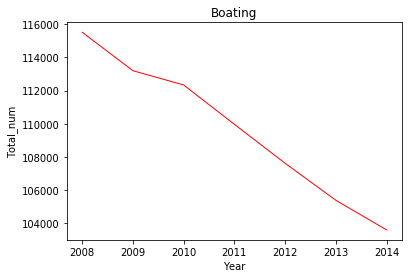

In [45]:
plt.plot(x,y,"r",linewidth=1)
plt.xlabel("Year")
plt.ylabel("Total_num")
plt.title("Boating")
plt.show()

In [46]:
con.close()

#### Method 2

In [47]:
%matplotlib inline

In [48]:
%%sql
select year,sum(num) as Total_num
from boating
group by year

Done.


year,Total_num
2008,115520
2009,113198
2010,112337
2011,109962
2012,107608
2013,105375
2014,103584


<Container object of 7 artists>

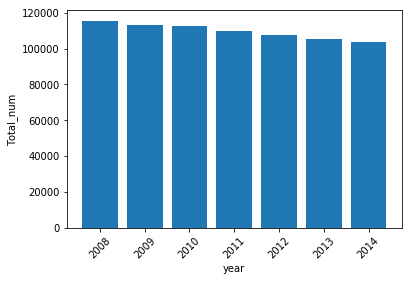

In [49]:
result = _
result.bar()